[**Demo %s**](#demo-integration-compare)

First consider the integral 

$$
\int_{-1}^1 \frac{1}{1+4x^2} \, dx = \arctan(2).
$$

In [2]:
f = @(x) 1 ./ (1 + 4*x.^2);
exact = atan(2);

We compare the two spectral integration methods for a range of $n$ values.

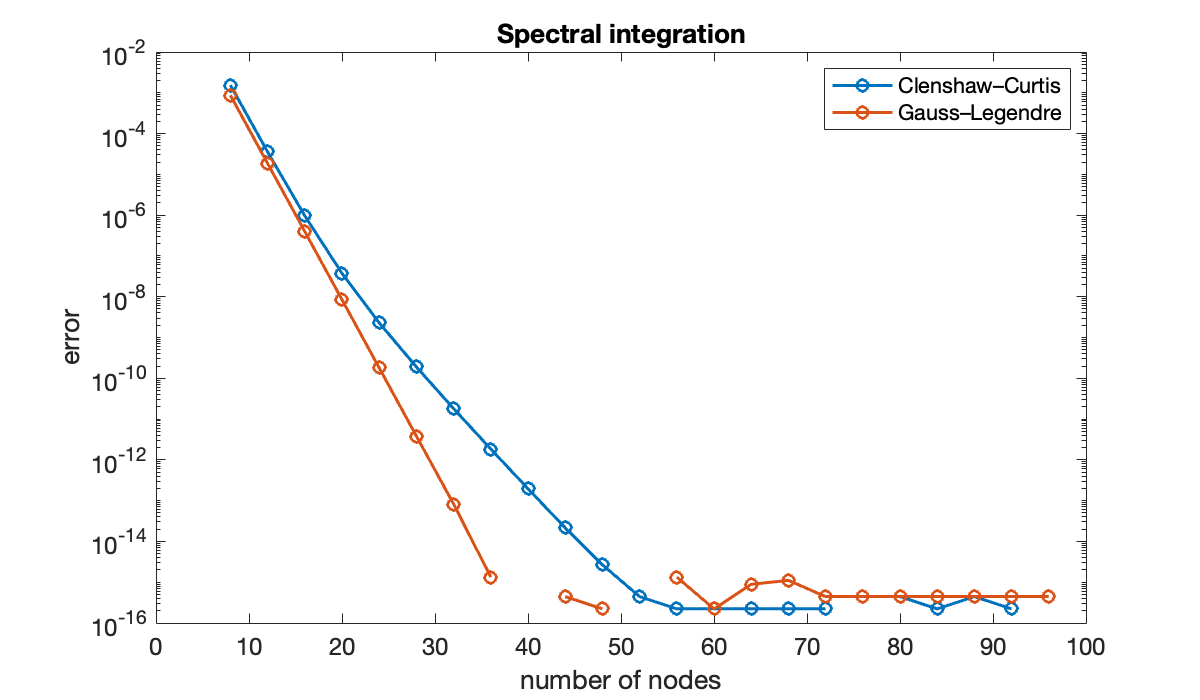

In [3]:
n = (8:4:96)';
errCC = zeros(size(n));
errGL = zeros(size(n));
for k = 1:length(n)
  errCC(k) = exact - ccint(f, n(k));
  errGL(k) = exact - glint(f, n(k));
end
clf,  semilogy(n, abs([errCC errGL]), 'o-')
xlabel('number of nodes'),  ylabel('error')
title('Spectral integration')   
legend('Clenshaw–Curtis', 'Gauss–Legendre')   

(The missing points are where the error is exactly zero.) Gauss–Legendre does converge faster here, but at something less than twice the rate.

Now we try a more sharply peaked integrand:
 
 $$\int_{-1}^1 \frac{1}{1+16x^2} \, dx = \frac{1}{2}\arctan(4).$$

In [4]:
f = @(x) 1 ./ (1 + 16*x.^2);
exact = atan(4) / 2;

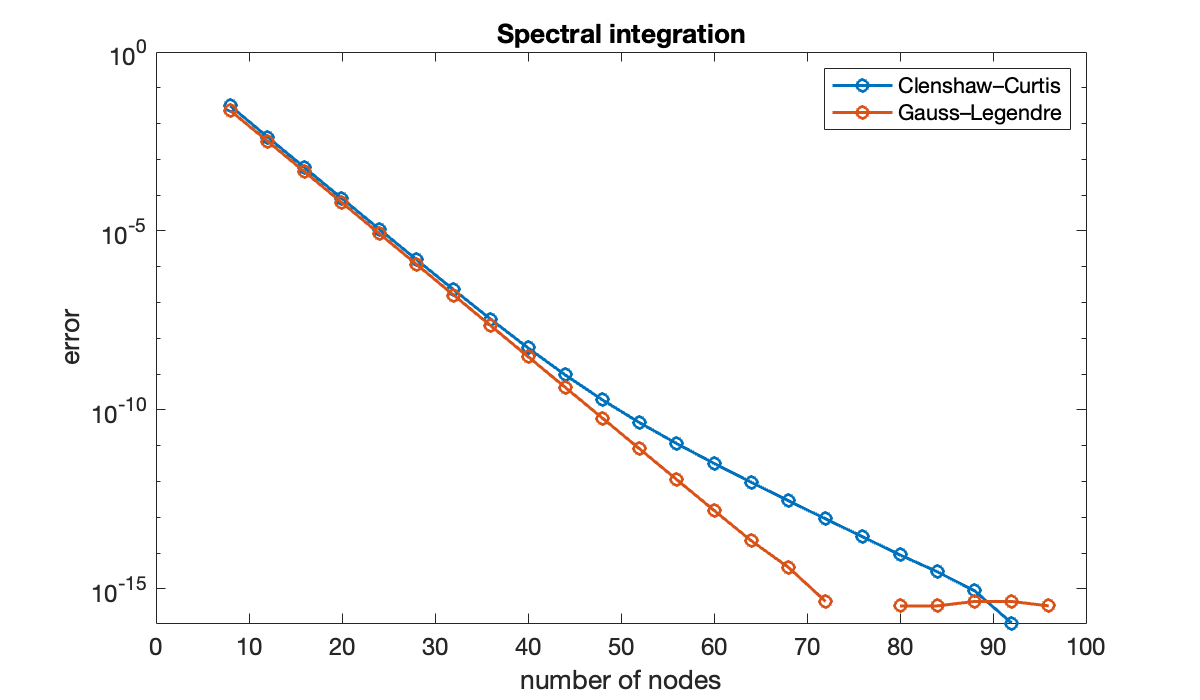

In [5]:
n = (8:4:96)';
errCC = zeros(size(n));
errGL = zeros(size(n));
for k = 1:length(n)
  errCC(k) = exact - ccint(f, n(k));
  errGL(k) = exact - glint(f, n(k));
end
clf,  semilogy(n, abs([errCC errGL]), 'o-')
xlabel('number of nodes'),  ylabel('error')
title('Spectral integration')   
legend('Clenshaw–Curtis', 'Gauss–Legendre')   

The two are very close until about $n=40$, when the Clenshaw–Curtis method slows down.

Now let's compare the spectral performance to that of our earlier adaptive method in `intadapt`. We will specify varying error tolerances and record the error as well as the total number of evaluations of $f$.

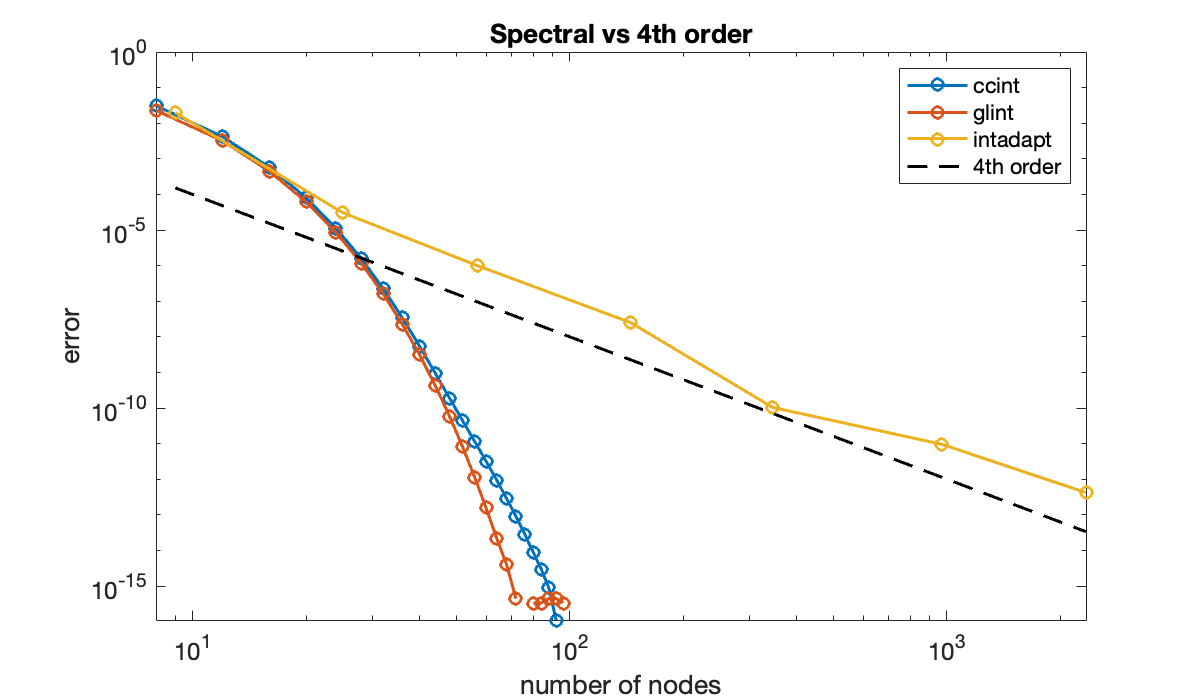

In [6]:
tol = 10 .^ (-2:-2:-14)';
n = zeros(size(tol));  
errAdapt = zeros(size(tol));
for k = 1:length(n)
  [Q, t] = intadapt(f, -1, 1, tol(k));
  errAdapt(k) = exact - Q;
  n(k) = length(t);
end
hold on;  semilogy(n, abs(errAdapt), 'o-')
plot(n, n.^(-4), 'k--')        % 4th order error
set(gca, 'xscale', 'log')     
legend('ccint', 'glint', 'intadapt', '4th order')  
title(('Spectral vs 4th order'));

At the core of `intadapt` is a fourth-order formula, and the results track that rate closely. For all but the most relaxed error tolerances, both spectral methods are far more efficient than the low-order counterpart. For other integrands, particularly those that vary nonuniformly across the interval, the adaptive method might be more competitive.